# PREDICTING TRENDS IN FOOD FLAVOURS (SUPERVISED LEARNING)


## Problem Statement
Predicting food trends for product development and innovation to maintain competitiveness. 
Final product will be an insights report proposing popular trending flavours for further consideration


## Audience
Product Development Dept.

## Success Metrics
Accuracy, Precision, Recall(Sensitivity), R-squared (R²) Score, Top-N Accuracy
    

## Data Source
Kaggle 
https://www.kaggle.com/datasets/zeeenb/recipes-from-tasty 
https://www.kaggle.com/datasets/pes12017000148/food-ingredients-and-recipe-dataset-with-images 

## SMART GOALS

### SPECIFIC
I plan to build a classification model to predict food flavour trends
I will collect labelled data where flavours are associated with certain attributes or characteristics.
I will split the dataset into training and testing sets to train and evaluate the performance of the supervised learning model.
I will use a supervised learning algorithm for classification. Such as algorithms like Decision Trees, Random Forests, Support Vector Machines (SVM), or Gradient Boosting classifiers.
I will train the selected model on the training data using the various features as input eg. ingredients, demographics, or geographical and the target variable as the output.

Bonus(if time permits):
I may use unsupervised learning techniques like clustering to group similar flavours together based on their characteristics without labelled data.


### MEASURABLE
To assess the model's predictive performance and its ability to capture relevant trends in the data, the following metrics can be used:
Accuracy 
Precision
Recall
R-squared (R²) Score

### ACHIEVABLE
I think that the project is appropriately scoped, not too large and not too small.
Dataset has around 13k rows.

### RELEVANT
#### Product Innovation and Development: 
Understanding food flavor trends allows food companies to innovate and develop new products that align with consumer preferences.
By predicting upcoming flavor trends, companies can stay ahead of the curve and introduce novel products that resonate with consumers.

#### Market Differentiation and Competitive Advantage:
Companies that accurately anticipate and respond to flavor trends can differentiate themselves in the market and gain a competitive edge. By offering trendy flavors that appeal to consumers, companies can attract new customers and retain existing ones.

#### Supply Chain Optimization: 
Predicting flavor trends can also benefit the supply chain by helping companies optimize sourcing and procurement strategies. 
By anticipating demand for specific ingredients and flavors, companies can ensure adequate supply and minimize inventory costs.

#### Consumer Insights and Engagement: 
Analyzing flavor trends provides valuable insights into consumer preferences and behavior. By understanding which flavors are popular and why, companies can tailor their offerings to better meet consumer needs and preferences, ultimately enhancing customer satisfaction and loyalty.

#### Marketing and Branding Strategies: 
Food flavor trends can influence marketing and branding strategies, helping companies position their products effectively in the market. By leveraging popular flavors in advertising campaigns and product packaging, companies can enhance brand perception and appeal to target audiences.



### TIME-BOUND
Project Milestone

Week 1: 
Data Processing and EDA

Week 2: 
Build model and Model Evaluation

Week 3: 
Interpretation and Summary 


## Assumptions
1. There is no limitations of any ingredients. No restrictions on supply of ingredients.

In [209]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import the CSV into a pandas DataFrame.
# Load recipe.csv into DataFrames.


In [210]:
recipe = pd.read_csv('recipe.csv', encoding='latin1')
recipe.head()

,id,recipeName,rating,totalTimeInSeconds,course,cuisine,ingredients
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,3600.0,Condiments and Sauces,Southern,"buttermilk cornbread, sandwich bread, salt, bl..."
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,8100.0,Desserts,American,"Country Crock® Spread, light corn syrup, cream..."
2,Buckeyes-298471,Buckeyes,4.0,6600.0,Desserts,American,"Skippy® Super Chunk® Peanut Butter, Country Cr..."
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,2100.0,Appetizers,American,"light mayonnaise, lemon juice, cayenne pepper ..."
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,1500.0,"Salads, Side Dishes",American,"elbow macaroni, hellmann' or best food real ma..."


In [211]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5475 non-null   object 
 1   recipeName          5475 non-null   object 
 2   rating              5474 non-null   float64
 3   totalTimeInSeconds  5240 non-null   float64
 4   course              5472 non-null   object 
 5   cuisine             5475 non-null   object 
 6   ingredients         5475 non-null   object 
dtypes: float64(2), object(5)
memory usage: 299.5+ KB


In [212]:
recipe.describe()

,rating,totalTimeInSeconds
count,5474.000000,5240.000000
mean,3.949763,3898.013359
std,0.770503,5761.176393
min,0.000000,60.000000
25%,4.000000,1560.000000
50%,4.000000,2700.000000
75%,4.000000,3900.000000
max,5.000000,88800.000000


In [213]:
#drop column 'totalTimeInSeconds'
recipe.drop('totalTimeInSeconds', axis=1, inplace=True)
recipe

,id,recipeName,rating,course,cuisine,ingredients
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,Condiments and Sauces,Southern,"buttermilk cornbread, sandwich bread, salt, bl..."
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,Desserts,American,"Country Crock® Spread, light corn syrup, cream..."
2,Buckeyes-298471,Buckeyes,4.0,Desserts,American,"Skippy® Super Chunk® Peanut Butter, Country Cr..."
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,Appetizers,American,"light mayonnaise, lemon juice, cayenne pepper ..."
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,"Salads, Side Dishes",American,"elbow macaroni, hellmann' or best food real ma..."
...,...,...,...,...,...,...
5470,Miso-Soup-1225759,Miso Soup,4.0,Soups,Japanese,"dashi, miso, silken tofu, wakame, green onions..."
5471,Miso-Marinated-Pork-_butaniku-no-misozuke_-751346,Miso Marinated Pork (butaniku no misozuke),4.0,Main Dishes,Japanese,"pork cutlets, white miso, red miso, fresh ging..."
5472,Japanese-Street-Food-Recipe---Chicken-Karaage-...,Japanese Street Food Recipe - Chicken Karaage,4.0,Main Dishes,Japanese,"chicken legs, sake, soy sauce, ginger, potato ..."
5473,Ponzu-MyRecipes-265663,Ponzu,4.0,Condiments and Sauces,Japanese,"green onions, fresh lemon juice, mirin, lower ..."


In [214]:
recipe.isnull().sum()


id             0
recipeName     0
rating         1
course         3
cuisine        0
ingredients    0
dtype: int64

In [215]:
#Drop nulls
recipe.dropna(inplace=True)

In [216]:
#check whether still got nulls
recipe.isnull().sum()

id             0
recipeName     0
rating         0
course         0
cuisine        0
ingredients    0
dtype: int64

## DATASET CLEANING 

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

# Sample text data
#text_data = "This is a sample sentence. It contains punctuation and stopwords."

# Tokenization
tokens = word_tokenize(text_data)

# Lowercasing
tokens = [token.lower() for token in tokens]

# Removing Punctuation
tokens = [token for token in tokens if token not in string.punctuation]

# Removing Stopwords
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]

# Stemming or Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(token) for token in tokens]

# Create a dictionary
document_dict = {'document_1': tokens}

print(document_dict)

In [218]:
# Tokenization. We will split the texts into individual words or tokens

# Tokenization function
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the 'ingredients' column
recipe['tokenized_ingredients'] = recipe['ingredients'].apply(tokenize_text)
recipe.head()

,id,recipeName,rating,course,cuisine,ingredients,tokenized_ingredients
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,Condiments and Sauces,Southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,..."
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,Desserts,American,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru..."
2,Buckeyes-298471,Buckeyes,4.0,Desserts,American,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co..."
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,Appetizers,American,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn..."
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,"Salads, Side Dishes",American,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo..."


In [219]:
# Lowercasing
# Function to convert tokenized words to lowercase
def lowercase_ingredients(tokens):
    lowercase_ingredients = [token.lower() for token in tokens]  # Use function argument 'tokens' instead of the undefined variable 'tokens'
    return lowercase_tokens

# Convert tokenized words to lowercase
recipe['lowercase_ingredients'] = recipe['tokenized_ingredients'].apply(lowercase_tokens)

# Display the DataFrame with tokenized ingredients and lowercase tokens
recipe

,id,recipeName,rating,course,cuisine,ingredients,tokenized_ingredients,lowercase_ingredients
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,Condiments and Sauces,Southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,..."
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,Desserts,American,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru..."
2,Buckeyes-298471,Buckeyes,4.0,Desserts,American,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co..."
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,Appetizers,American,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn..."
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,"Salads, Side Dishes",American,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo..."
...,...,...,...,...,...,...,...,...
5469,Chicken-Teriyaki-573526,Chicken Teriyaki,4.0,Main Dishes,Japanese,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir..."
5470,Miso-Soup-1225759,Miso Soup,4.0,Soups,Japanese,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,..."
5471,Miso-Marinated-Pork-_butaniku-no-misozuke_-751346,Miso Marinated Pork (butaniku no misozuke),4.0,Main Dishes,Japanese,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ..."
5472,Japanese-Street-Food-Recipe---Chicken-Karaage-...,Japanese Street Food Recipe - Chicken Karaage,4.0,Main Dishes,Japanese,"chicken legs, sake, soy sauce, ginger, potato ...","[chicken, legs, ,, sake, ,, soy, sauce, ,, gin...","[chicken, legs, ,, sake, ,, soy, sauce, ,, gin..."


In [220]:
#Remove punctuation
# Function to remove punctuation from tokenized words
def remove_punctuation(tokens):
    no_punctuation_ingredients = [token for token in tokens if token not in string.punctuation]
    return no_punctuation_ingredients
    
recipe['no_punctuation_ingredients'] = recipe['lowercase_ingredients'].apply(remove_punctuation)
recipe

,id,recipeName,rating,course,cuisine,ingredients,tokenized_ingredients,lowercase_ingredients,no_punctuation_ingredients
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,Condiments and Sauces,Southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, sandwich, bread, salt,..."
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,Desserts,American,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru...","[country, crock®, spread, light, corn, syrup, ..."
2,Buckeyes-298471,Buckeyes,4.0,Desserts,American,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co...","[skippy®, super, chunk®, peanut, butter, count..."
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,Appetizers,American,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, lemon, juice, cayenne, pep..."
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,"Salads, Side Dishes",American,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, hellmann, or, best, food, re..."
...,...,...,...,...,...,...,...,...,...
5469,Chicken-Teriyaki-573526,Chicken Teriyaki,4.0,Main Dishes,Japanese,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, light, soy, sauce, mirin, sa..."
5470,Miso-Soup-1225759,Miso Soup,4.0,Soups,Japanese,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, miso, silken, tofu, wakame, green, oni..."
5471,Miso-Marinated-Pork-_butaniku-no-misozuke_-751346,Miso Marinated Pork (butaniku no misozuke),4.0,Main Dishes,Japanese,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, white, miso, red, miso, fresh,..."
5472,Japanese-Street-Food-Recipe---Chicken-Karaage-...,Japanese Street Food Recipe - Chicken Karaage,4.0,Main Dishes,Japanese,"chicken legs, sake, soy sauce, ginger, potato ...","[chicken, legs, ,, sake, ,, soy, sauce, ,, gin...","[chicken, legs, ,, sake, ,, soy, sauce, ,, gin...","[chicken, legs, sake, soy, sauce, ginger, pota..."


In [229]:
# Removing Stopwords
# Function to remove stop words from tokenized words
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    no_stopwords_ingredients = [token for token in tokens if token.lower() not in stop_words]
    return no_stopwords_ingredients

# Remove stop words from tokenized words
recipe['no_stopwords_ingredients'] = recipe['no_punctuation_ingredients'].apply(remove_stopwords)
recipe

,id,recipeName,rating,course,cuisine,ingredients,tokenized_ingredients,lowercase_ingredients,no_punctuation_ingredients,no_stopwords_ingredients
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,Condiments and Sauces,Southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,..."
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,Desserts,American,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ..."
2,Buckeyes-298471,Buckeyes,4.0,Desserts,American,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count..."
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,Appetizers,American,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep..."
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,"Salads, Side Dishes",American,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, hellmann, or, best, food, re...","[elbow, macaroni, hellmann, best, food, real, ..."
...,...,...,...,...,...,...,...,...,...,...
5469,Chicken-Teriyaki-573526,Chicken Teriyaki,4.0,Main Dishes,Japanese,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thighs, light, soy, sauce, mirin, sa..."
5470,Miso-Soup-1225759,Miso Soup,4.0,Soups,Japanese,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni..."
5471,Miso-Marinated-Pork-_butaniku-no-misozuke_-751346,Miso Marinated Pork (butaniku no misozuke),4.0,Main Dishes,Japanese,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlets, white, miso, red, miso, fresh,..."
5472,Japanese-Street-Food-Recipe---Chicken-Karaage-...,Japanese Street Food Recipe - Chicken Karaage,4.0,Main Dishes,Japanese,"chicken legs, sake, soy sauce, ginger, potato ...","[chicken, legs, ,, sake, ,, soy, sauce, ,, gin...","[chicken, legs, ,, sake, ,, soy, sauce, ,, gin...","[chicken, legs, sake, soy, sauce, ginger, pota...","[chicken, legs, sake, soy, sauce, ginger, pota..."


In [222]:
# Stemming or Lemmatization
# Instantiate lemmatizer and PorterStemmer

#p_stemmer =PorterStemmer()
#lemmatizer = WordNetLemmatizer()


In [230]:
# Lemmatization function
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_ingredients = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_ingredients

# Stemming function
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    stemmed_ingredients = [stemmer.stem(token) for token in tokens]
    return stemmed_ingredients

In [231]:
# Lemmatize the filtered tokens
recipe['lemmatized_ingredients'] = recipe['no_stopwords_ingredients'].apply(lemmatize_tokens)

# Stem the filtered tokens
recipe['stemmed_ingredients'] = recipe['no_stopwords_ingredients'].apply(stem_tokens)

In [232]:
#We will go with lemmatizing as the words we need are mainly nouns, without prefixes or suffixes.
recipe.loc[:,'lemmatized_ingredients']


0       [buttermilk, cornbread, sandwich, bread, salt,...
1       [country, crock®, spread, light, corn, syrup, ...
2       [skippy®, super, chunk®, peanut, butter, count...
3       [light, mayonnaise, lemon, juice, cayenne, pep...
4       [elbow, macaroni, hellmann, best, food, real, ...
                              ...                        
5469    [chicken, thigh, light, soy, sauce, mirin, sak...
5470    [dashi, miso, silken, tofu, wakame, green, oni...
5471    [pork, cutlet, white, miso, red, miso, fresh, ...
5472    [chicken, leg, sake, soy, sauce, ginger, potat...
5473    [green, onion, fresh, lemon, juice, mirin, low...
Name: lemmatized_ingredients, Length: 5471, dtype: object

In [233]:
recipe.loc[:,'stemmed_ingredients']


0       [buttermilk, cornbread, sandwich, bread, salt,...
1       [countri, crock®, spread, light, corn, syrup, ...
2       [skippy®, super, chunk®, peanut, butter, count...
3       [light, mayonnais, lemon, juic, cayenn, pepper...
4       [elbow, macaroni, hellmann, best, food, real, ...
                              ...                        
5469    [chicken, thigh, light, soy, sauc, mirin, sake...
5470    [dashi, miso, silken, tofu, wakam, green, onio...
5471    [pork, cutlet, white, miso, red, miso, fresh, ...
5472    [chicken, leg, sake, soy, sauc, ginger, potato...
5473    [green, onion, fresh, lemon, juic, mirin, lowe...
Name: stemmed_ingredients, Length: 5471, dtype: object

## CREATING A NEW DICTIONARY

In [234]:
# Create a new dictionary to store cleaned and lemmatized data
cleaned_data_dict = {}

# Iterate over each row in the DataFrame
for index, row in recipe.iterrows():
    cleaned_ingredients = row['lemmatized_ingredients']  # Assuming 'lemmatized_ingredients' is the column containing cleaned and lemmatized tokens
    cleaned_data_dict[index] = cleaned_ingredients


In [235]:
cleaned_data_dict

{0: ['buttermilk',
  'cornbread',
  'sandwich',
  'bread',
  'salt',
  'black',
  'pepper',
  'rubbed',
  'sage',
  'egg',
  'onion',
  'celery',
  'butter',
  'cream',
  'chicken',
  'soup',
  'chicken',
  'stock'],
 1: ['country',
  'crock®',
  'spread',
  'light',
  'corn',
  'syrup',
  'creamy',
  'peanut',
  'butter',
  'confectioner',
  'sugar',
  'vanilla',
  'extract'],
 2: ['skippy®',
  'super',
  'chunk®',
  'peanut',
  'butter',
  'country',
  'crock®',
  'spread',
  'confectioner',
  'sugar',
  'semi-sweet',
  'chocolate',
  'morsel'],
 3: ['light',
  'mayonnaise',
  'lemon',
  'juice',
  'cayenne',
  'pepper',
  'sauce',
  'blue',
  'cheese',
  'chive',
  'shredded',
  'cheddar',
  'cheese',
  'cooked',
  'chicken'],
 4: ['elbow',
  'macaroni',
  'hellmann',
  'best',
  'food',
  'real',
  'mayonnais',
  'red',
  'vinegar',
  'white',
  'white',
  'wine',
  'hellmann',
  "'s",
  'dijonnaise',
  'creamy',
  'dijon',
  'mustard',
  'sugar',
  'salt',
  'ground',
  'black',
 

## CLUSTERING & GROUPING OF INGREDIENTS

## VECTORIZATION Using TF-IDF, to represent each ingredient as a high-dimensional vector.
## To convert pre-processed text data into numerical vectors

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the dictionary into a list of documents
documents = [' '.join(tokens) for tokens in cleaned_data_dict.values()]

# Create TF-IDF vectorizer, instantiate.
tvec = TfidfVectorizer()

# Fit-transform the data to create TF-IDF vectors
tvec = tvec.fit_transform(documents)

In [237]:
documents

['buttermilk cornbread sandwich bread salt black pepper rubbed sage egg onion celery butter cream chicken soup chicken stock',
 'country crock® spread light corn syrup creamy peanut butter confectioner sugar vanilla extract',
 'skippy® super chunk® peanut butter country crock® spread confectioner sugar semi-sweet chocolate morsel',
 'light mayonnaise lemon juice cayenne pepper sauce blue cheese chive shredded cheddar cheese cooked chicken',
 "elbow macaroni hellmann best food real mayonnais red vinegar white white wine hellmann 's dijonnaise creamy dijon mustard sugar salt ground black pepper celery green bell pepper slice onion",
 'hellmann best food real mayonnais lemon juice sugar salt cabbage carrot green bell pepper',
 '2 reduced-fat milk unsalted butter purpose unbleached flour fine sea salt ground black pepper grated nutmeg',
 'skippy creamy peanut butter sugar cream cheese frozen whipped topping hot fudge topping 9 inch chocolate crumb crust',
 'pie crust egg light corn syrup b

In [238]:
tvec

<5471x1662 sparse matrix of type '<class 'numpy.float64'>'
	with 95595 stored elements in Compressed Sparse Row format>

In [239]:
# Convert the sparse matrix to a dense array
dense_tvec = tvec.toarray()

# Display the dense array
print(dense_tvec)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Clustering algorithms applied to vectorized ingredients data to group similar ingredients

In [240]:
# We will use DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
dbscan = DBSCAN()
dbscan.fit(dense_tvec);


In [242]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)  # You need to tune the hyperparameters eps and min_samples
dbscan.fit(dense_tvec)

# Get the cluster labels
cluster_labels = dbscan.labels_



In [243]:
cluster_labels

array([ -1,  -1,  -1, ...,  -1, 175, 178], dtype=int64)

In [244]:
# Display the cluster labels
for document, label in zip(cleaned_data_dict.keys(), cluster_labels):
    print(f"{document}: Cluster {label}")

0: Cluster -1
1: Cluster -1
2: Cluster -1
3: Cluster -1
4: Cluster 0
5: Cluster 1
6: Cluster 2
7: Cluster -1
8: Cluster -1
9: Cluster -1
10: Cluster -1
11: Cluster -1
12: Cluster -1
13: Cluster -1
14: Cluster -1
15: Cluster -1
16: Cluster -1
17: Cluster -1
18: Cluster -1
19: Cluster -1
20: Cluster -1
21: Cluster -1
22: Cluster -1
23: Cluster -1
24: Cluster -1
25: Cluster -1
26: Cluster -1
27: Cluster -1
28: Cluster -1
29: Cluster -1
30: Cluster -1
31: Cluster -1
32: Cluster 3
33: Cluster -1
34: Cluster -1
35: Cluster -1
36: Cluster 4
37: Cluster -1
38: Cluster -1
39: Cluster -1
40: Cluster -1
41: Cluster -1
42: Cluster -1
43: Cluster -1
44: Cluster -1
45: Cluster -1
46: Cluster -1
47: Cluster -1
48: Cluster 5
49: Cluster 6
50: Cluster -1
51: Cluster -1
52: Cluster -1
53: Cluster -1
54: Cluster -1
55: Cluster -1
56: Cluster -1
57: Cluster -1
58: Cluster -1
59: Cluster 7
60: Cluster -1
61: Cluster -1
62: Cluster 8
63: Cluster -1
64: Cluster -1
65: Cluster -1
66: Cluster -1
67: Cluster -1

In [245]:
unique_labels = set(cluster_labels)  # Get unique cluster labels
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude outliers if present
print("Number of clusters:", num_clusters)

Number of clusters: 342


# Check if there are at least two unique cluster labels
unique_labels = set(cluster_labels)
if len(unique_labels) <= 1:
    print("Error: DBSCAN assigned only one cluster. Silhouette score cannot be computed.")
else:
    # Compute silhouette score
    silhouette = silhouette_score(tfidf_vectors, cluster_labels)
    print("Silhouette Score:", silhouette)

## Sihoutte Score

In [246]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score
silhouette_avg = silhouette_score(tfidf_vectors, cluster_labels)

In [247]:
print("The silhouette score of the DBSCAN clustering:", silhouette_avg)

The silhouette score of the DBSCAN clustering: -0.07385369219964318


# Cluster Analysis to understand the characteristics of each group of ingredients

## Principal Component Analysis (PCA)

In [248]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

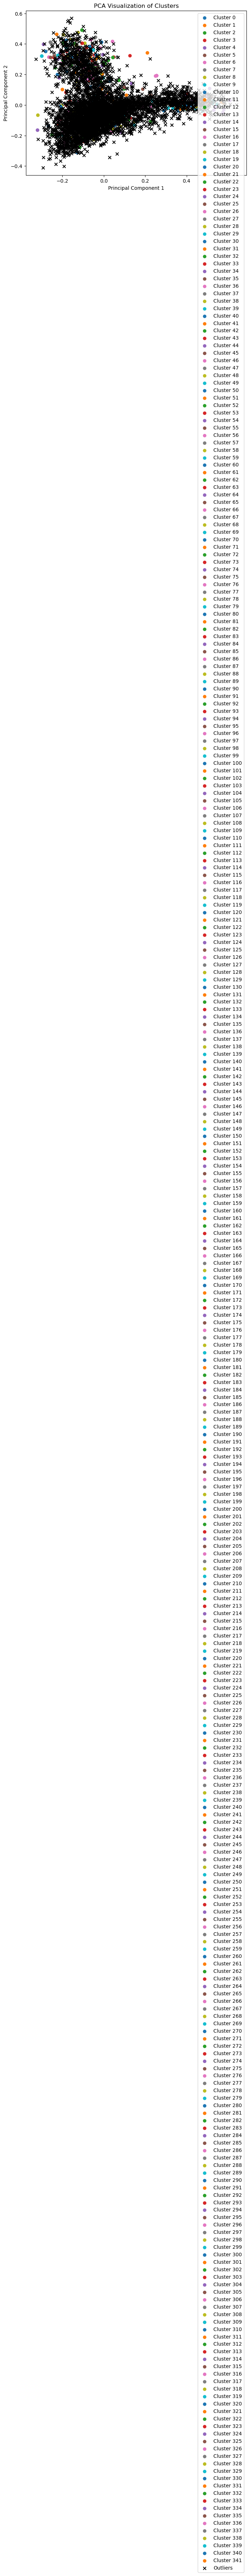

In [249]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_vectors = pca.fit_transform(dense_tvec)

# Create a scatter plot of the PCA-transformed data
plt.figure(figsize=(8, 6))
for label in set(cluster_labels):
    if label == -1:
        # Plot outliers as separate points
        outlier_indices = [i for i, l in enumerate(cluster_labels) if l == label]
        plt.scatter(pca_vectors[outlier_indices, 0], pca_vectors[outlier_indices, 1], label='Outliers', marker='x', color='black')
    else:
        # Plot points belonging to each cluster
        cluster_indices = [i for i, l in enumerate(cluster_labels) if l == label]
        plt.scatter(pca_vectors[cluster_indices, 0], pca_vectors[cluster_indices, 1], label=f'Cluster {label}')

plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## CLEANING FOR 'CUISINE' in recipe dataframe

In [250]:
recipe

,id,recipeName,rating,course,cuisine,ingredients,tokenized_ingredients,lowercase_ingredients,no_punctuation_ingredients,no_stopwords_ingredients,lemmatized_ingredients,stemmed_ingredients
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,Condiments and Sauces,Southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,..."
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,Desserts,American,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[countri, crock®, spread, light, corn, syrup, ..."
2,Buckeyes-298471,Buckeyes,4.0,Desserts,American,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count..."
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,Appetizers,American,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnais, lemon, juic, cayenn, pepper..."
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,"Salads, Side Dishes",American,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, hellmann, or, best, food, re...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5469,Chicken-Teriyaki-573526,Chicken Teriyaki,4.0,Main Dishes,Japanese,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thigh, light, soy, sauce, mirin, sak...","[chicken, thigh, light, soy, sauc, mirin, sake..."
5470,Miso-Soup-1225759,Miso Soup,4.0,Soups,Japanese,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakam, green, onio..."
5471,Miso-Marinated-Pork-_butaniku-no-misozuke_-751346,Miso Marinated Pork (butaniku no misozuke),4.0,Main Dishes,Japanese,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlet, white, miso, red, miso, fresh, ...","[pork, cutlet, white, miso, red, miso, fresh, ..."
5472,Japanese-Street-Food-Recipe---Chicken-Karaage-...,Japanese Street Food Recipe - Chicken Karaage,4.0,Main Dishes,Japanese,"chicken legs, sake, soy sauce, ginger, potato ...","[chicken, leg

In [266]:
# Convert 'cuisine' column to lowercase
recipe['cuisine'] = recipe['cuisine'].str.lower()
recipe



,id,recipeName,rating,course,cuisine,ingredients,tokenized_ingredients,lowercase_ingredients,no_punctuation_ingredients,no_stopwords_ingredients,lemmatized_ingredients,stemmed_ingredients
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,Condiments and Sauces,southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,..."
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,Desserts,american,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[countri, crock®, spread, light, corn, syrup, ..."
2,Buckeyes-298471,Buckeyes,4.0,Desserts,american,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count..."
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,Appetizers,american,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnais, lemon, juic, cayenn, pepper..."
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,"Salads, Side Dishes",american,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, hellmann, or, best, food, re...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5469,Chicken-Teriyaki-573526,Chicken Teriyaki,4.0,Main Dishes,japanese,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thigh, light, soy, sauce, mirin, sak...","[chicken, thigh, light, soy, sauc, mirin, sake..."
5470,Miso-Soup-1225759,Miso Soup,4.0,Soups,japanese,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakam, green, onio..."
5471,Miso-Marinated-Pork-_butaniku-no-misozuke_-751346,Miso Marinated Pork (butaniku no misozuke),4.0,Main Dishes,japanese,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlet, white, miso, red, miso, fresh, ...","[pork, cutlet, white, miso, red, miso, fresh, ..."
5472,Japanese-Street-Food-Recipe---Chicken-Karaage-...,Japanese Street Food Recipe - Chicken Karaage,4.0,Main Dishes,japanese,"chicken legs, sake, soy sauce, ginger, potato ...","[chicken, leg

In [267]:
#Removing punctuations
recipe['cuisine'] = recipe['cuisine'].str.replace(r'[^\w\s]+', '')
recipe

,id,recipeName,rating,course,cuisine,ingredients,tokenized_ingredients,lowercase_ingredients,no_punctuation_ingredients,no_stopwords_ingredients,lemmatized_ingredients,stemmed_ingredients
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,Condiments and Sauces,southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,..."
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,Desserts,american,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[countri, crock®, spread, light, corn, syrup, ..."
2,Buckeyes-298471,Buckeyes,4.0,Desserts,american,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count..."
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,Appetizers,american,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnais, lemon, juic, cayenn, pepper..."
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,"Salads, Side Dishes",american,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, hellmann, or, best, food, re...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5469,Chicken-Teriyaki-573526,Chicken Teriyaki,4.0,Main Dishes,japanese,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thigh, light, soy, sauce, mirin, sak...","[chicken, thigh, light, soy, sauc, mirin, sake..."
5470,Miso-Soup-1225759,Miso Soup,4.0,Soups,japanese,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakam, green, onio..."
5471,Miso-Marinated-Pork-_butaniku-no-misozuke_-751346,Miso Marinated Pork (butaniku no misozuke),4.0,Main Dishes,japanese,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlet, white, miso, red, miso, fresh, ...","[pork, cutlet, white, miso, red, miso, fresh, ..."
5472,Japanese-Street-Food-Recipe---Chicken-Karaage-...,Japanese Street Food Recipe - Chicken Karaage,4.0,Main Dishes,japanese,"chicken legs, sake, soy sauce, ginger, potato ...","[chicken, leg

In [269]:
# Function to remove stopwords from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Remove stopwords from text in 'TextColumn'
recipe['cuisine'] = recipe['cuisine'].apply(remove_stopwords)
recipe

,id,recipeName,rating,course,cuisine,ingredients,tokenized_ingredients,lowercase_ingredients,no_punctuation_ingredients,no_stopwords_ingredients,lemmatized_ingredients,stemmed_ingredients
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,Condiments and Sauces,southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,..."
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,Desserts,american,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[countri, crock®, spread, light, corn, syrup, ..."
2,Buckeyes-298471,Buckeyes,4.0,Desserts,american,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count..."
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,Appetizers,american,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnais, lemon, juic, cayenn, pepper..."
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,"Salads, Side Dishes",american,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, hellmann, or, best, food, re...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5469,Chicken-Teriyaki-573526,Chicken Teriyaki,4.0,Main Dishes,japanese,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thigh, light, soy, sauce, mirin, sak...","[chicken, thigh, light, soy, sauc, mirin, sake..."
5470,Miso-Soup-1225759,Miso Soup,4.0,Soups,japanese,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakam, green, onio..."
5471,Miso-Marinated-Pork-_butaniku-no-misozuke_-751346,Miso Marinated Pork (butaniku no misozuke),4.0,Main Dishes,japanese,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlet, white, miso, red, miso, fresh, ...","[pork, cutlet, white, miso, red, miso, fresh, ..."
5472,Japanese-Street-Food-Recipe---Chicken-Karaage-...,Japanese Street Food Recipe - Chicken Karaage,4.0,Main Dishes,japanese,"chicken legs, sake, soy sauce, ginger, potato ...","[chicken, leg

In [270]:
# Function to lemmatize text
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# Lemmatize text in 'TextColumn'
recipe['cuisine'] = recipe['cuisine'].apply(lemmatize_text)
recipe

,id,recipeName,rating,course,cuisine,ingredients,tokenized_ingredients,lowercase_ingredients,no_punctuation_ingredients,no_stopwords_ingredients,lemmatized_ingredients,stemmed_ingredients
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,Condiments and Sauces,southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,..."
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,Desserts,american,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[countri, crock®, spread, light, corn, syrup, ..."
2,Buckeyes-298471,Buckeyes,4.0,Desserts,american,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count..."
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,Appetizers,american,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnais, lemon, juic, cayenn, pepper..."
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,"Salads, Side Dishes",american,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, hellmann, or, best, food, re...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5469,Chicken-Teriyaki-573526,Chicken Teriyaki,4.0,Main Dishes,japanese,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thigh, light, soy, sauce, mirin, sak...","[chicken, thigh, light, soy, sauc, mirin, sake..."
5470,Miso-Soup-1225759,Miso Soup,4.0,Soups,japanese,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakam, green, onio..."
5471,Miso-Marinated-Pork-_butaniku-no-misozuke_-751346,Miso Marinated Pork (butaniku no misozuke),4.0,Main Dishes,japanese,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlet, white, miso, red, miso, fresh, ...","[pork, cutlet, white, miso, red, miso, fresh, ..."
5472,Japanese-Street-Food-Recipe---Chicken-Karaage-...,Japanese Street Food Recipe - Chicken Karaage,4.0,Main Dishes,japanese,"chicken legs, sake, soy sauce, ginger, potato ...","[chicken, leg

In [206]:
recipe.loc[:,'cuisine']

0       southern
1       american
2       american
3       american
4       american
          ...   
5469    japanese
5470    japanese
5471    japanese
5472    japanese
5473    japanese
Name: cuisine, Length: 5471, dtype: object

In [272]:
# Perform one-hot encoding using get_dummies
encoded_data = pd.get_dummies(recipe, columns=['cuisine'], prefix='cuisine')
encoded_data

,id,recipeName,rating,course,ingredients,tokenized_ingredients,lowercase_ingredients,no_punctuation_ingredients,no_stopwords_ingredients,lemmatized_ingredients,...,cuisine_southwestern,"cuisine_southwestern, american","cuisine_southwestern, american, chinese, asian","cuisine_southwestern, american, mexican","cuisine_spanish, american, cuban","cuisine_spanish, cuban","cuisine_spanish, italian","cuisine_spanish, southwestern, american",cuisine_thai,"cuisine_thai, asian"
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,Condiments and Sauces,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...",...,False,False,False,False,False,False,False,False,False,False
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,Desserts,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...",...,False,False,False,False,False,False,False,False,False,False
2,Buckeyes-298471,Buckeyes,4.0,Desserts,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...",...,False,False,False,False,False,False,False,False,False,False
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,Appetizers,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...",...,False,False,False,False,False,False,False,False,False,False
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,"Salads, Side Dishes","elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, hellmann, or, best, food, re...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ...",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,Chicken-Teriyaki-573526,Chicken Teriyaki,4.0,Main Dishes,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thigh, light, soy, sauce, mirin, sak...",...,False,False,False,False,False,False,False,False,False,False
5470,Miso-Soup-1225759,Miso Soup,4.0,Soups,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...",...,False,False,False,False,False,False,False,False,False,False
5471,Miso-Marinated-Pork-_butaniku-no-misozuke_-751346,Miso Marinated Pork (butaniku no misozuke),4.0,Main Dishes,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlets

In [273]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5471 entries, 0 to 5473
Columns: 157 entries, id to cuisine_thai, asian
dtypes: bool(146), float64(1), object(10)
memory usage: 1.3+ MB


In [276]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'cuisine' column
recipe['cuisine_encoded'] = label_encoder.fit_transform(recipe['cuisine'])

recipe

,id,recipeName,rating,course,cuisine,ingredients,tokenized_ingredients,lowercase_ingredients,no_punctuation_ingredients,no_stopwords_ingredients,lemmatized_ingredients,stemmed_ingredients,cuisine_encoded
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,Condiments and Sauces,southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...",129
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,Desserts,american,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[countri, crock®, spread, light, corn, syrup, ...",0
2,Buckeyes-298471,Buckeyes,4.0,Desserts,american,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...",0
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,Appetizers,american,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnais, lemon, juic, cayenn, pepper...",0
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,"Salads, Side Dishes",american,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, hellmann, or, best, food, re...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,Chicken-Teriyaki-573526,Chicken Teriyaki,4.0,Main Dishes,japanese,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thigh, light, soy, sauce, mirin, sak...","[chicken, thigh, light, soy, sauc, mirin, sake...",121
5470,Miso-Soup-1225759,Miso Soup,4.0,Soups,japanese,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakam, green, onio...",121
5471,Miso-Marinated-Pork-_butaniku-no-misozuke_-751346,Miso Marinated Pork (butaniku no misozuke),4.0,Main Dishes,japanese,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlet, white, miso, red, miso, fresh, ...","[pork, cutlet, white, miso, red, miso, fresh, ...",121
5472,Japanese-Street-Food-Recipe---Chicken-Karaage-...,Japanese Street Food Recipe - Chicken Karaage,4.0,Main Dishes,japanese,"chicken legs, sake, s

## Feature Engineering
## Extract features from ingredients data- Cuisine types, create document -term matrix or use TF-IDF


In [277]:
# Add cluster assignments as new features
cleaned_data_dict['cluster_labels'] = cluster_labels

# Train classifier using cluster assignments as features
classifier = RandomForestClassifier()  # Example: using Random Forest classifier
classifier.fit(X_train, y_train)

# Make predictions on test data
predictions = classifier.predict(X_test)


NameError: name 'X_train' is not defined

In [172]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_data_dict.drop('Target', axis=1), data['Target'], test_size=0.2, random_state=42)

AttributeError: 'dict' object has no attribute 'drop'

## Build classification model to predict food flavour trends based on features extracted from 'Clustering'
## BUILD CLASSIFICATION MODEL: RANDOM FOREST

In [174]:
#Random Forest classification model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [179]:
# Example DataFrame with original features and cluster assignments
# Replace this with your actual DataFrame containing features and cluster assignments
recipe = pd.recipe({
    'Feature1': cuisine,
    'cleaned_data_dict': cluster_labels  # Cluster assignments as features cleaned_data_dict['cluster_labels']
    # Add more features and clusters as needed
})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Target', axis=1), data['Target'], test_size=0.2, random_state=42)

# Train Random Forest classifier using original features and cluster assignments as features
#classifier = RandomForestClassifier()  # Example: using Random Forest classifier
#classifier.fit(X_train, y_train)

# Make predictions on test data
#predictions = classifier.predict(X_test)

# Evaluate classifier performance
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy:", accuracy)

AttributeError: module 'pandas' has no attribute 'recipe'

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Target', axis=1), data['Target'], test_size=0.2, random_state=42)


In [178]:
# Train Random Forest classifier using original features and cluster assignments as features
classifier = RandomForestClassifier()  # Example: using Random Forest classifier
classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# Make predictions on test data
predictions = classifier.predict(X_test)

In [ ]:
# Evaluate classifier performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Class Name',axis=1)
y = df[['cleaned_data_dict']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Split data into training/testing sets to evaluate performance of the model

In [ ]:
## Model evaluation
## Silhoutte, acccuracy, presicion, recall, F1-Score

## Interpret results

In [23]:
new_recipe

,id,recipeName,rating,totalTimeInSeconds,course,cuisine,ingredients,buttermilk,"cornbread,",sandwich,...,chocolate-hazelnut,"orecchiette,","gorgonzola,","bertolli,",rotini,DeLallo,"mentsuyu,","wakame,",Tofu,total_occurrences
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,3600.0,Condiments and Sauces,Southern,"buttermilk cornbread, sandwich bread, salt, bl...",1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,8100.0,Desserts,American,"Country Crock® Spread, light corn syrup, cream...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
2,Buckeyes-298471,Buckeyes,4.0,6600.0,Desserts,American,"Skippy® Super Chunk® Peanut Butter, Country Cr...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,2100.0,Appetizers,American,"light mayonnaise, lemon juice, cayenne pepper ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,1500.0,"Salads, Side Dishes",American,"elbow macaroni, hellmann' or best food real ma...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,Miso-Soup-1225759,Miso Soup,4.0,600.0,Soups,Japanese,"dashi, miso, silken tofu, wakame, green onions...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,8.0
5471,Miso-Marinated-Pork-_butaniku-no-misozuke_-751346,Miso Marinated Pork (butaniku no misozuke),4.0,2400.0,Main Dishes,Japanese,"pork cutlets, white miso, red miso, fresh ging...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
5472,Japanese-Street-Food-Recipe---Chicken-Karaage-...,Japanese Street Food Recipe - Chicken Karaage,4.0,2700.0,Main Dishes,Japanese,"chicken legs, sake, soy sauce, ginger, potato ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
5473,Ponzu-MyRecipes-265663,Ponzu,4.0,600.0,Condiments and Sauces,Japanese,"green onions, fresh lemon juice, mirin, lower ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0


##  BUILD CLASSIFICATION MODEL: RANDOM FOREST

## Model Prep: Create X and y variables

In [ ]:
features = ['cuisine', 'rating', 'ingredients']
X = df[features]
y = df[flavour]

## Train/Test Split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y)

## Model instantiation

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
et = ExtraTreesClassifier(n_estimators=100)

## Model Evaluation

In [ ]:
cross_val_score(et, X_train, y_train, cv=5).mean()

In [ ]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

## Grid Search

In [ ]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

In [ ]:
gs.score(X_train, y_train)

In [ ]:
gs.score(X_val, y_val)

## PREDICTIONS

In [ ]:
preds=gs.predict(dftest[features])